Encoder circuit:


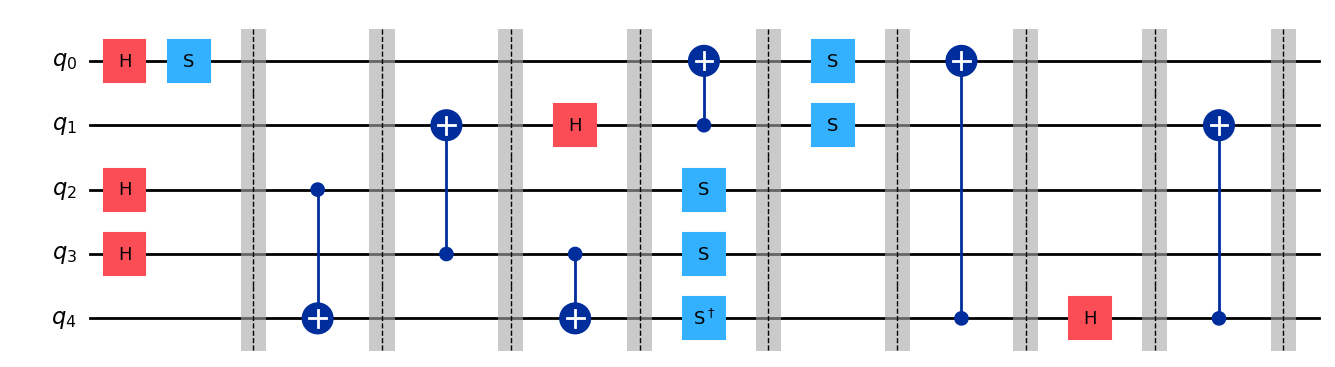

Encoded state prepared.
Initial fidelity with standard logical |+>: 1.0000000000


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_aer import AerSimulator
import numpy as np
import random

# --- Encoder circuit for 5-qubit code logical |+> ---
def your_encoder():
    qc = QuantumCircuit(5)
    qc.h(0)       # Prepare |+> on qubit 0

    qc.s(0)
    qc.h(2)
    qc.h(3)
    qc.barrier()

    qc.cx(2, 4)
    qc.barrier()

    qc.cx(3, 1)
    qc.barrier()

    qc.h(1)
    qc.cx(3, 4)
    qc.barrier()

    qc.cx(1, 0)
    qc.s(2)
    qc.s(3)
    qc.sdg(4)
    qc.barrier()

    qc.s(0)
    qc.s(1)
    qc.barrier()

    qc.cx(4, 0)
    qc.barrier()

    qc.h(4)
    qc.barrier()

    qc.cx(4, 1)
    qc.barrier()

    print("Encoder circuit:")
    display(qc.draw('mpl'))
    return qc

# --- Standard 5-qubit logical |+> state (manual construction) ---
def logical_plus_state():
    logical_zero_vec = (
        Statevector.from_label('00000') +
        Statevector.from_label('10010') +
        Statevector.from_label('01001') +
        Statevector.from_label('10100') +
        Statevector.from_label('01010') -
        Statevector.from_label('11011') -
        Statevector.from_label('00110') -
        Statevector.from_label('11000') -
        Statevector.from_label('11101') -
        Statevector.from_label('00011') -
        Statevector.from_label('11110') -
        Statevector.from_label('01111') -
        Statevector.from_label('10001') -
        Statevector.from_label('01100') -
        Statevector.from_label('10111') +
        Statevector.from_label('00101')
    )

    logical_one_vec = (
        Statevector.from_label('11111') +
        Statevector.from_label('01101') +
        Statevector.from_label('10110') +
        Statevector.from_label('01011') +
        Statevector.from_label('10101') -
        Statevector.from_label('00100') -
        Statevector.from_label('11001') -
        Statevector.from_label('00111') -
        Statevector.from_label('00010') -
        Statevector.from_label('11100') -
        Statevector.from_label('00001') -
        Statevector.from_label('10000') -
        Statevector.from_label('01110') -
        Statevector.from_label('10011') -
        Statevector.from_label('01000') +
        Statevector.from_label('11010')
    )

    logical_zero = logical_zero_vec.data
    logical_zero /= np.linalg.norm(logical_zero)

    logical_one = logical_one_vec.data
    logical_one /= np.linalg.norm(logical_one)

    logical_plus = (logical_zero + logical_one) / np.sqrt(2)
    return Statevector(logical_plus)

# --- Main flow ---
def main():
    # Step 1: Encode logical |+> state
    encoder = your_encoder()
    encoded_sv = Statevector.from_instruction(encoder)
    print("Encoded state prepared.")

    # Step 2: Reference logical |+> from manual construction
    logical_plus = logical_plus_state()
    initial_fid = state_fidelity(encoded_sv, logical_plus)
    print(f"Initial fidelity with standard logical |+>: {initial_fid:.10f}")

if __name__ == "__main__":
    main()

# Complete 5-qubit code implementation

Adding X error on qubit 0
Full circuit with 5-qubit encoding followed by syndrome detection:
Final 9-qubit statevector prepared.
{'0101': 1024}
Measured syndrome: 0101
Syndrome 0101: not recognized! No correction applied.
Full circuit with 5-qubit encoding, syndrome detection, and correction:


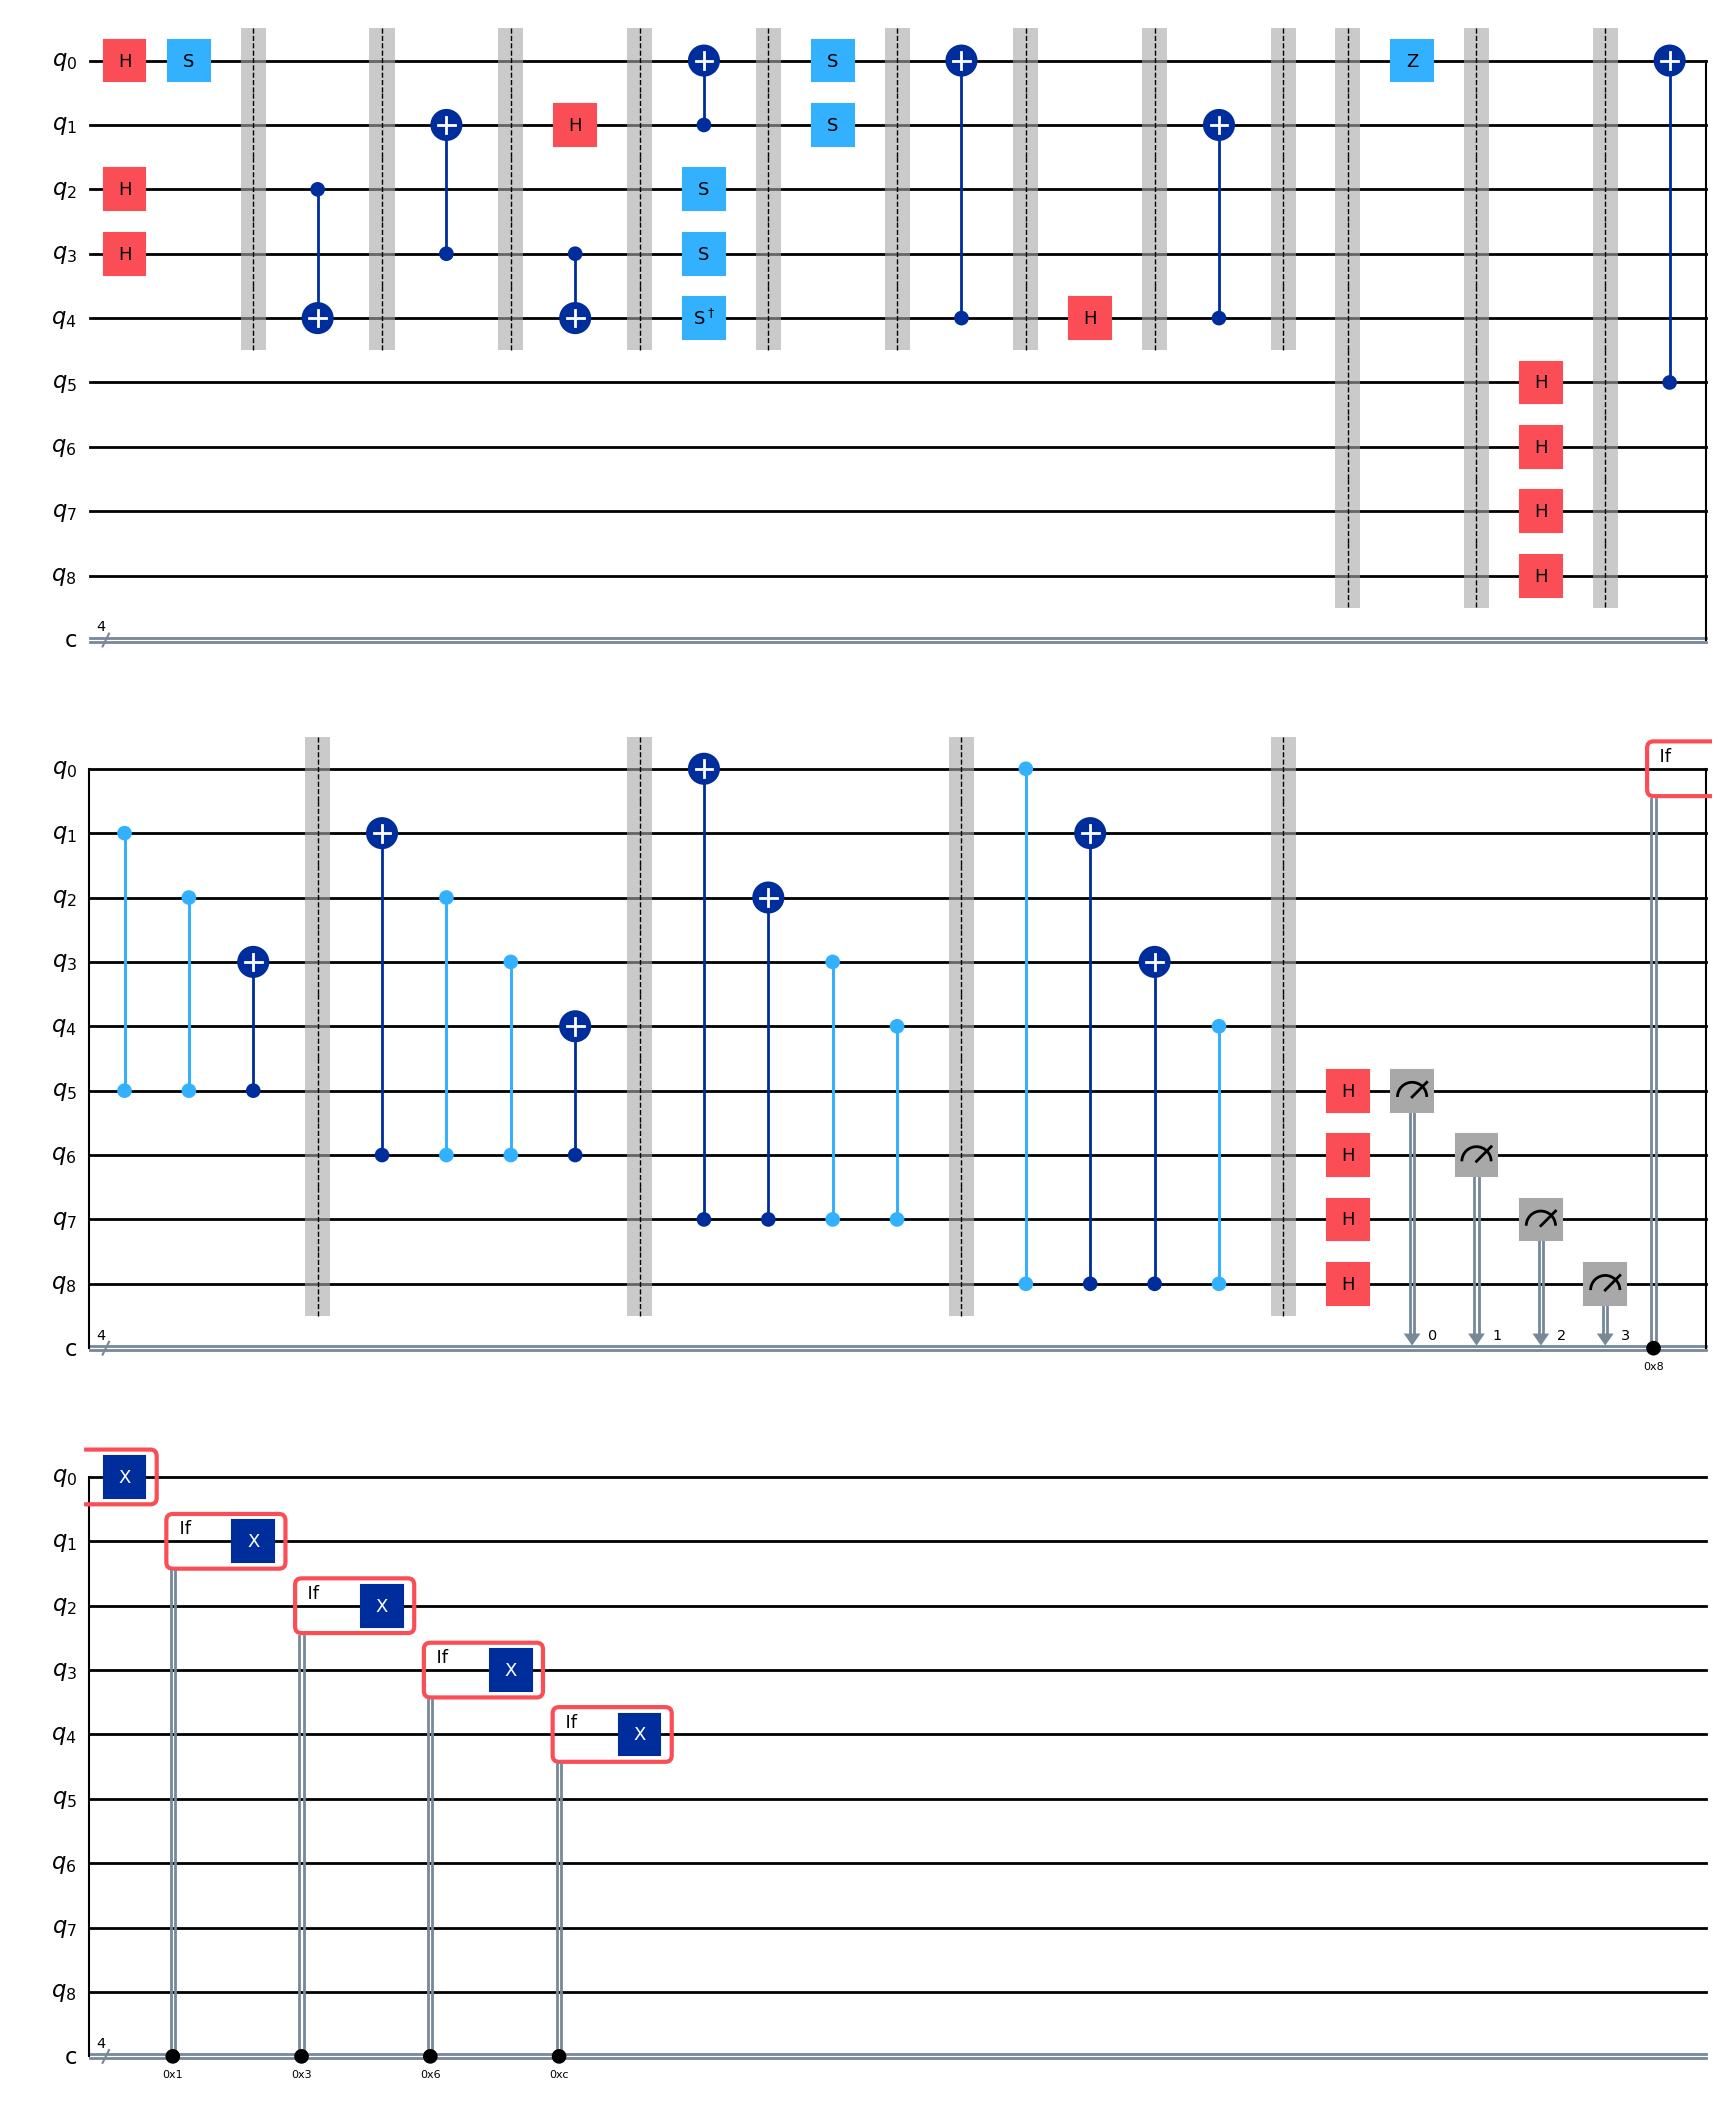

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import XGate
import numpy as np

# --- Five-qubit encoder circuit (acts only on qubits 0–4) ---
def five_qubit_encoding():
    qc = QuantumCircuit(5)
    qc.h(0)       # Prepare |+> on qubit 0

    qc.s(0)
    qc.h(2)
    qc.h(3)
    qc.barrier()

    qc.cx(2, 4)
    qc.barrier()

    qc.cx(3, 1)
    qc.barrier()

    qc.h(1)
    qc.cx(3, 4)
    qc.barrier()

    qc.cx(1, 0)
    qc.s(2)
    qc.s(3)
    qc.sdg(4)
    qc.barrier()

    qc.s(0)
    qc.s(1)
    qc.barrier()

    qc.cx(4, 0)
    qc.barrier()

    qc.h(4)
    qc.barrier()

    qc.cx(4, 1)
    qc.barrier()

    return qc

# --- Syndrome detection circuit (acts on qubits 0–8, but only adds gates after encoding) ---
def syndrome_detection():

    
    qc = QuantumCircuit(9, 4)

    # Step 1: Apply Hadamard to ancilla qubits (5–8)
    for anc in range(5, 9):
        qc.h(anc)
    qc.barrier()

    # Step 2: Apply Stabilizers

    qc.cx(5, 0)
    qc.cz(5, 1)
    qc.cz(5, 2)
    qc.cx(5, 3)
    qc.barrier()

    qc.cx(6, 1)
    qc.cz(6, 2)
    qc.cz(6, 3)
    qc.cx(6, 4)
    qc.barrier()

    qc.cx(7, 0)
    qc.cx(7, 2)
    qc.cz(7, 3)
    qc.cz(7, 4)
    qc.barrier()

    qc.cz(8, 0)
    qc.cx(8, 1)
    qc.cx(8, 3)
    qc.cz(8, 4)
    qc.barrier()

    # Step 3: Apply Hadamard to ancilla qubits (5–8)
    for anc in range(5, 9):
        qc.h(anc)

    # Step 4: Measure ancilla qubits 5–8 into classical bits 0–3
    for i, anc in enumerate(range(5, 9)):
        qc.measure(anc, i)

    return qc

def add_random_bitflip_error(qc):
    qc.barrier()
    error_qubit = random.choice(range(5))
    print(f"Adding X error on qubit {error_qubit}")
    qc.z(error_qubit)
    qc.barrier()

syndrome_to_qubit = {
        '1000': 0,  # X0
        '0001': 1,  # X1
        '0011': 2,  # X2
        '0110': 3,  # X3
        '1100': 4,  # X4
    }

def apply_syndrome_correction(full_circuit):
    
    # For each syndrome, add a conditional X gate using if_test
    for syndrome_str, qubit in syndrome_to_qubit.items():
        syndrome_int = int(syndrome_str, 2)
        # Qiskit expects a tuple: (register, value)
        with full_circuit.if_test((full_circuit.cregs[0], syndrome_int)):
            full_circuit.x(qubit)





# --- Main program: combine encoding and syndrome detection ---
def main():
    encoder = five_qubit_encoding()         # 5-qubit circuit (data only)
    syndrome = syndrome_detection()         # 9-qubit circuit with classical register

    # Create full 9-qubit, 4-classical-bit circuit
    full_circuit = QuantumCircuit(9, 4)

    # Step 1: Apply encoding on qubits 0–4
    full_circuit.compose(encoder, qubits=[0, 1, 2, 3, 4], inplace=True)

    add_random_bitflip_error(full_circuit)


    # Step 3: Apply syndrome detection on full circuit (qubits 0–8, clbits 0–3)
    full_circuit.compose(syndrome, qubits=range(9), clbits=range(4), inplace=True)

    # Visualize the full circuit
    print("Full circuit with 5-qubit encoding followed by syndrome detection:")
    # display(full_circuit.draw('mpl'))

    # Optional: simulate the final statevector (no measurement collapse)
    state = Statevector.from_instruction(full_circuit.remove_final_measurements(inplace=False))
    print("Final 9-qubit statevector prepared.")

    simulator = AerSimulator()

    # Run the circuit
    job = simulator.run(full_circuit, shots=1024)
    result = job.result()

    counts = result.get_counts()
    print(counts)

    # Find the most probable syndrome

    measured_syndrome = max(counts, key=counts.get)
    print(f"Measured syndrome: {measured_syndrome}")
    if measured_syndrome not in syndrome_to_qubit:
        print(f"Syndrome {measured_syndrome}: not recognized! No correction applied.")
    else:
        print(f"Syndrome {measured_syndrome}: correcting X error on qubit {syndrome_to_qubit[measured_syndrome]}")

    # --- NEW: Apply correction and print status ---
    apply_syndrome_correction(full_circuit)

    # (Optional) Visualize the circuit after correction
    print("Full circuit with 5-qubit encoding, syndrome detection, and correction:")
    display(full_circuit.draw('mpl'))


if __name__ == "__main__":
    main()
